In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import scipy.constants as const
import scipy
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter

# Dados gerais e temas usados nos plots

In [2]:
df = pd.read_csv('/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Dados/Dados projeto 1.csv', sep=',')

In [3]:

# --- Tema e fontes globais ---
sns.set_theme(style="darkgrid")  # estilo seaborn v0.8 darkgrid
plt.rcParams.update({
    "font.size": 12,       # tamanho geral da fonte
    "axes.titlesize": 18,  # tamanho do título
    "axes.labelsize": 12,  # tamanho dos labels dos eixos
    "xtick.labelsize": 14, # tamanho dos ticks no eixo x
    "ytick.labelsize": 14, # tamanho dos ticks no eixo y
    "legend.fontsize": 10  # tamanho da legenda
})
cores = [
    "#F94144", "#F3722C", "#F8961E", "#F9844A", "#F9C74F",
    "#90BE6D", "#43AA8B", "#4D908E", "#577590", "#277DA1"
]

# Vou plotar os dados que eu tirei do LAB

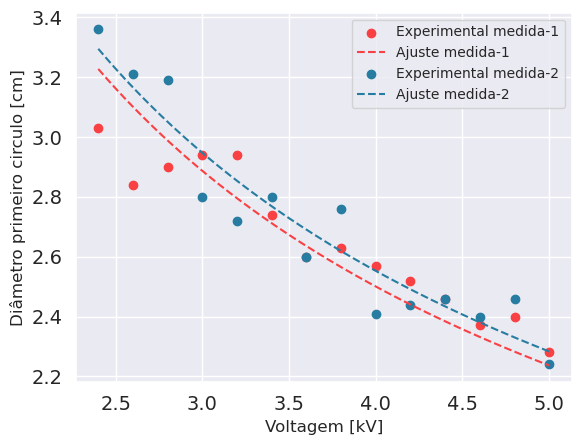

In [4]:
# Sua função modelo
def model_func(x, a):
    return a / np.sqrt(x)

# Pegando os dados
xdata = df['voltage [kv]'].values
ydata_gui = df['d1 [cm] Gui'].values
ydata_joao = df['d1 [cm] Joao'].values

# Fit para Gui
popt_gui, pcov_gui = curve_fit(model_func, xdata, ydata_gui)
a_gui = popt_gui[0]

# Fit para João
popt_joao, pcov_joao = curve_fit(model_func, xdata, ydata_joao)
a_joao = popt_joao[0]

# Gerando curva ajustada
xfit = np.linspace(min(xdata), max(xdata), 200)
yfit_gui = model_func(xfit, a_gui)
yfit_joao = model_func(xfit, a_joao)

# Plot
plt.Figure(figsize=(14, 10),dpi=600)
plt.scatter(xdata, ydata_gui, marker='o', label='Experimental medida-1',color=cores[0])
plt.plot(xfit, yfit_gui, '--', label=f'Ajuste medida-1',color=cores[0])

plt.scatter(xdata, ydata_joao, marker='o', label='Experimental medida-2',color=cores[9])
plt.plot(xfit, yfit_joao, '--', label=f'Ajuste medida-2',color=cores[9])


plt.xlabel("Voltagem [kV]")
plt.ylabel("Diâmetro primeiro circulo [cm]")
plt.legend()
plt.grid(True)
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/fit1.png", dpi=600,transparent=True,bbox_inches="tight")
plt.show()


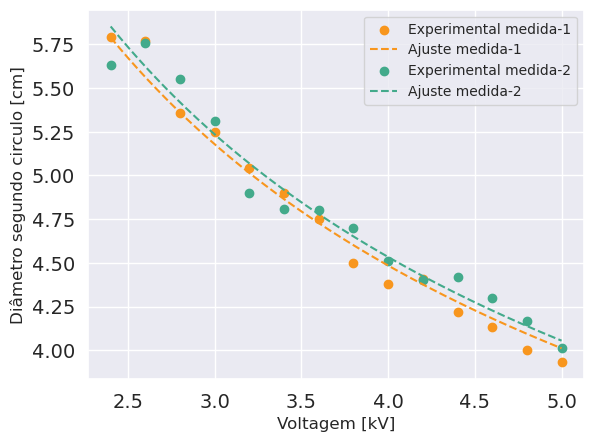

In [5]:
# Sua função modelo
def model_func(x, a):
    return a / np.sqrt(x)

# Pegando os dados
xdata = df['voltage [kv]'].values
ydata_gui = df['d2 [cm] Gui'].values
ydata_joao = df['d2 [cm] Joao'].values

# Fit para Gui
popt_gui, pcov_gui = curve_fit(model_func, xdata, ydata_gui)
a_gui = popt_gui[0]

# Fit para João
popt_joao, pcov_joao = curve_fit(model_func, xdata, ydata_joao)
a_joao = popt_joao[0]

# Gerando curva ajustada
xfit = np.linspace(min(xdata), max(xdata), 200)
yfit_gui = model_func(xfit, a_gui)
yfit_joao = model_func(xfit, a_joao)

# Plot
plt.Figure(figsize=(14, 10),dpi=600)
plt.scatter(xdata, ydata_gui, marker='o', label='Experimental medida-1',color=cores[2])
plt.plot(xfit, yfit_gui, '--', label=f'Ajuste medida-1', color=cores[2])

plt.scatter(xdata, ydata_joao, marker='o', label='Experimental medida-2',color=cores[6])
plt.plot(xfit, yfit_joao, '--', label=f'Ajuste medida-2',color=cores[6])

plt.xlabel("Voltagem [kV]")
plt.ylabel("Diâmetro segundo circulo [cm]")
plt.legend()
plt.grid(True)
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/fit2.png", dpi=600,transparent=True,bbox_inches="tight")
plt.show()


# Conseguindo a constante de Planck

In [6]:
l = 0.15 # distância do detector
d = np.array([2.13,1.23,0.805,0.591,0.465])*1e-10 # distância interplanar

voltage = df['voltage [kv]'].values*1000
x1 = df['d2 [cm] Gui'].values/100
y1 = x1*d[3]/l
voltage = df['voltage [kv]'].values*1000
x2 = np.sqrt(1/voltage)
y2 = np.sqrt(150/voltage)*1e-10


In [7]:

l = 0.15  # distância do detector
d = np.array([2.13, 1.23, 0.805, 0.591, 0.465]) * 1e-10  # distâncias interplanares

voltage = df['voltage [kv]'].values * 1000
x1 = df['d2 [cm] Gui'].values / 100
x2 = np.sqrt(1 / voltage)

# y2 não depende de d
y2 = np.sqrt(150 / voltage) * 1e-10

# dicionário de saída
resultados = {}

# percorre cada ponto y1[j] e testa todos d[i]
for j in range(len(x1)):
    melhor_d = None
    melhor_dif = np.inf
    melhor_y2 = None
    
    for di in d:
        y1_val = x1[j] * di / l  # valor do y1 para esse d
        
        # compara esse valor com todos de y2
        diffs = np.abs(y1_val - y2)
        idx_y2 = np.argmin(diffs)
        diff_min = diffs[idx_y2]
        
        if diff_min < melhor_dif:
            melhor_dif = diff_min
            melhor_d = di
            melhor_y2 = y2[idx_y2]
    
    # salva no dicionário usando o valor de y1 (para o melhor d) como chave
    resultados[f"y1[{j}]"] = {
        "melhor_d": melhor_d,
        "y1_val": x1[j] * melhor_d / l,
        "melhor_y2": melhor_y2,
        "diferença": melhor_dif
    }

# exemplo de como imprimir
for k, v in resultados.items():
    print(f"{k}: y1 = {v['y1_val']:.3e}, melhor y2 = {v['melhor_y2']:.3e}, d = {v['melhor_d']:.3e}, diferença = {v['diferença']:.3e}")


y1[0]: y1 = 1.795e-11, melhor y2 = 1.806e-11, d = 4.650e-11, diferença = 1.089e-13
y1[1]: y1 = 1.789e-11, melhor y2 = 1.806e-11, d = 4.650e-11, diferença = 1.709e-13
y1[2]: y1 = 2.112e-11, melhor y2 = 2.100e-11, d = 5.910e-11, diferença = 1.142e-13
y1[3]: y1 = 2.068e-11, melhor y2 = 2.041e-11, d = 5.910e-11, diferença = 2.726e-13
y1[4]: y1 = 1.986e-11, melhor y2 = 1.987e-11, d = 5.910e-11, diferença = 1.039e-14
y1[5]: y1 = 1.931e-11, melhor y2 = 1.936e-11, d = 5.910e-11, diferença = 5.892e-14
y1[6]: y1 = 1.872e-11, melhor y2 = 1.890e-11, d = 5.910e-11, diferença = 1.832e-13
y1[7]: y1 = 1.773e-11, melhor y2 = 1.768e-11, d = 5.910e-11, diferença = 5.233e-14
y1[8]: y1 = 1.726e-11, melhor y2 = 1.732e-11, d = 5.910e-11, diferença = 6.331e-14
y1[9]: y1 = 1.738e-11, melhor y2 = 1.732e-11, d = 5.910e-11, diferença = 5.489e-14
y1[10]: y1 = 2.265e-11, melhor y2 = 2.236e-11, d = 8.050e-11, diferença = 2.867e-13
y1[11]: y1 = 2.216e-11, melhor y2 = 2.236e-11, d = 8.050e-11, diferença = 1.963e-13
y1

In [8]:

l = 0.15  # distância do detector
d = np.array([2.13, 1.23, 0.805, 0.591, 0.465]) * 1e-10  # distâncias interplanares

voltage = df['voltage [kv]'].values * 1000  # em volts
x1 = df['d2 [cm] Gui'].values / 100

# y2 não depende de d
y2 = np.sqrt(150 / voltage) * 1e-10

# dicionário de saída
resultados = {}
melhores_voltages = []  # lista para guardar os melhores valores de voltagem

for j in range(len(x1)):
    melhor_d = None
    melhor_dif = np.inf
    melhor_y2 = None
    melhor_voltage = None
    
    for di in d:
        y1_val = x1[j] * di / l  # valor de y1 para esse d
        
        # compara esse valor com todos de y2
        diffs = np.abs(y1_val - y2)
        idx_y2 = np.argmin(diffs)
        diff_min = diffs[idx_y2]
        
        if diff_min < melhor_dif:
            melhor_dif = diff_min
            melhor_d = di
            melhor_y2 = y2[idx_y2]
            melhor_voltage = voltage[idx_y2]
    
    # salva no dicionário
    resultados[f"y1[{j}]"] = {
        "melhor_d": melhor_d,
        "y1_val": x1[j] * melhor_d / l,
        "melhor_y2": melhor_y2,
        "melhor_voltage": melhor_voltage,
        "diferença": melhor_dif
    }
    
    # adiciona a lista de melhores voltages
    melhores_voltages.append(melhor_voltage)

# imprimir os resultados
for k, v in resultados.items():
    print(f"{k}: y1 = {v['y1_val']:.3e}, melhor y2 = {v['melhor_y2']:.3e}, "
          f"d = {v['melhor_d']:.3e}, V = {v['melhor_voltage']/1000:.1f} kV, "
          f"diferença = {v['diferença']:.3e}")

print("\nLista dos melhores valores de voltagem (kV):")
print([v/1000 for v in melhores_voltages])


y1[0]: y1 = 1.795e-11, melhor y2 = 1.806e-11, d = 4.650e-11, V = 4.6 kV, diferença = 1.089e-13
y1[1]: y1 = 1.789e-11, melhor y2 = 1.806e-11, d = 4.650e-11, V = 4.6 kV, diferença = 1.709e-13
y1[2]: y1 = 2.112e-11, melhor y2 = 2.100e-11, d = 5.910e-11, V = 3.4 kV, diferença = 1.142e-13
y1[3]: y1 = 2.068e-11, melhor y2 = 2.041e-11, d = 5.910e-11, V = 3.6 kV, diferença = 2.726e-13
y1[4]: y1 = 1.986e-11, melhor y2 = 1.987e-11, d = 5.910e-11, V = 3.8 kV, diferença = 1.039e-14
y1[5]: y1 = 1.931e-11, melhor y2 = 1.936e-11, d = 5.910e-11, V = 4.0 kV, diferença = 5.892e-14
y1[6]: y1 = 1.872e-11, melhor y2 = 1.890e-11, d = 5.910e-11, V = 4.2 kV, diferença = 1.832e-13
y1[7]: y1 = 1.773e-11, melhor y2 = 1.768e-11, d = 5.910e-11, V = 4.8 kV, diferença = 5.233e-14
y1[8]: y1 = 1.726e-11, melhor y2 = 1.732e-11, d = 5.910e-11, V = 5.0 kV, diferença = 6.331e-14
y1[9]: y1 = 1.738e-11, melhor y2 = 1.732e-11, d = 5.910e-11, V = 5.0 kV, diferença = 5.489e-14
y1[10]: y1 = 2.265e-11, melhor y2 = 2.236e-11, d =

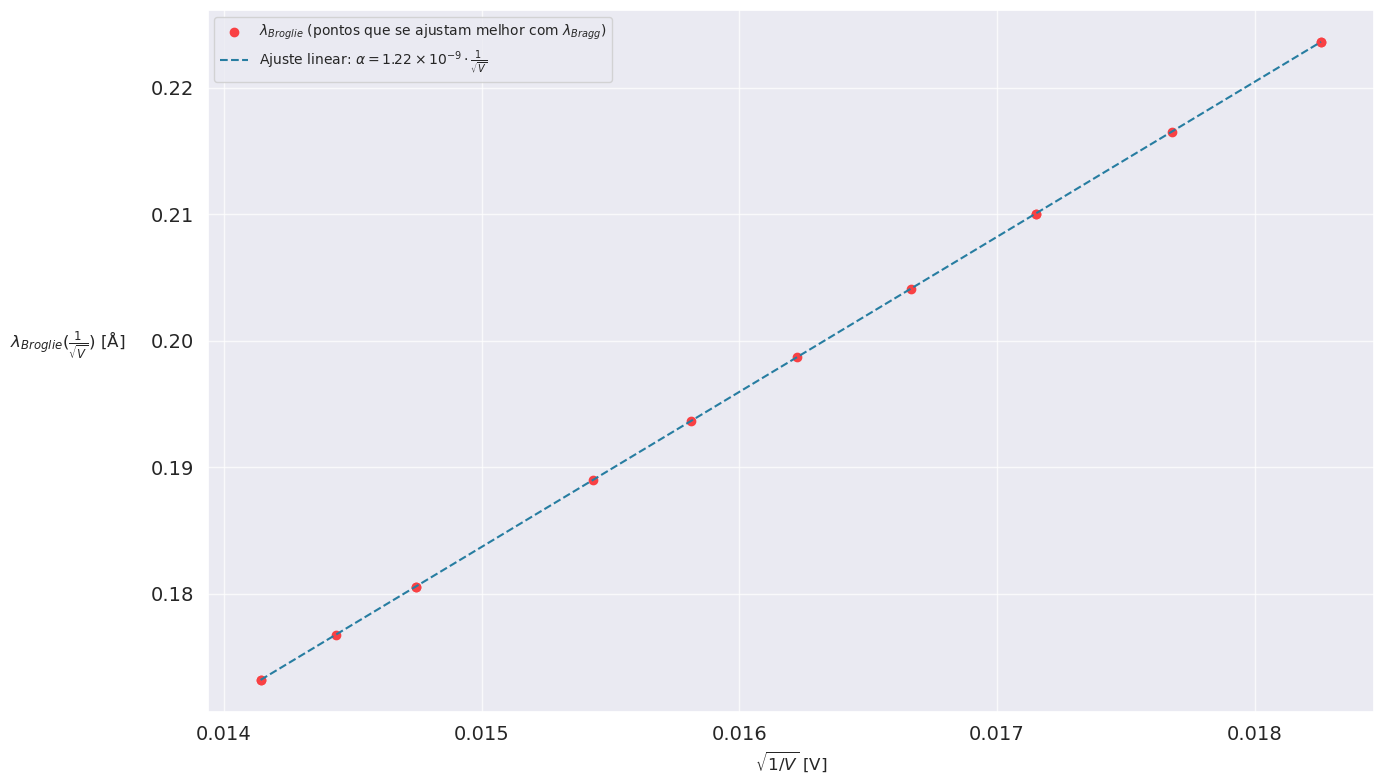

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Função para formatar em notação científica "bonita"
def sci_notation(num, decimals=2):
    s = f"{num:.{decimals}e}"
    mantissa, exp = s.split("e")
    return rf"{mantissa} \times 10^{{{int(exp)}}}"

# seus dados
melhores_voltages_arr = np.array(melhores_voltages)
x2 = np.sqrt(1 / melhores_voltages_arr)
y2 = np.sqrt(150 / melhores_voltages_arr) * 1e-10  # ainda em metros

# ajuste linear
a, b = np.polyfit(x2, y2, 1)

# reta ajustada
x_fit = np.linspace(min(x2), max(x2), 200)
y_fit = a * x_fit + b

# plot
plt.figure(figsize=(14,8))

plt.scatter(
    x2, y2,
    color=cores[0],
    label=r"$\lambda_{Broglie}$ (pontos que se ajustam melhor com $\lambda_{Bragg}$)"
)

plt.plot(
    x_fit, y_fit,
    color=cores[9],
    linestyle="--",
    label=rf"Ajuste linear: $\alpha={sci_notation(a)} \cdot \frac{{1}}{{\sqrt{{V}}}}$"
)

plt.xlabel(r"$\sqrt{1/V}$ [V]")
plt.ylabel(r"$\lambda_{Broglie}(\frac{1}{\sqrt{V}})$ [Å]", rotation=0, labelpad=60)

# formatador: converte de metros → Å (multiplica por 1e10)
formatter = ticker.FuncFormatter(lambda val, pos: f"{val*1e10:.2f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True, alpha=0.75)
plt.tight_layout()
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/fit3.png", dpi=600,transparent=True,bbox_inches="tight")
plt.show()


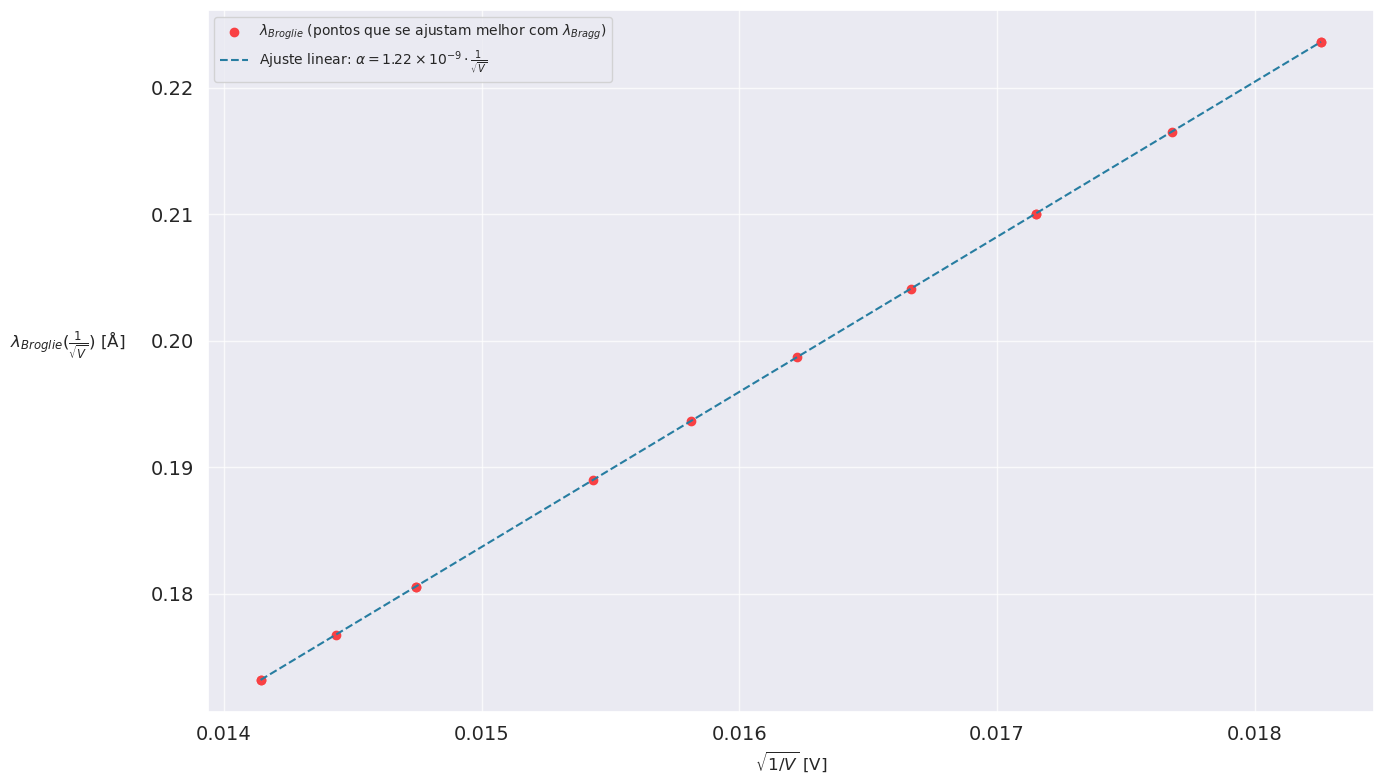

Incerteza de alpha (a_err): 5.1885e-25


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Função para formatar em notação científica "bonita"
def sci_notation(num, decimals=2):
    s = f"{num:.{decimals}e}"
    mantissa, exp = s.split("e")
    return rf"{mantissa} \times 10^{{{int(exp)}}}"

# seus dados
melhores_voltages_arr = np.array(melhores_voltages)
x2 = np.sqrt(1 / melhores_voltages_arr)
y2 = np.sqrt(150 / melhores_voltages_arr) * 1e-10  # ainda em metros

# ajuste linear
a, b = np.polyfit(x2, y2, 1)

# CALCULAR INCERTEZA DE ALPHA (nova parte)
coeffs, cov = np.polyfit(x2, y2, 1, cov=True)
a_err = np.sqrt(cov[0, 0])  # incerteza de alpha

# reta ajustada
x_fit = np.linspace(min(x2), max(x2), 200)
y_fit = a * x_fit + b

# plot
plt.figure(figsize=(14,8))

plt.scatter(
    x2, y2,
    color=cores[0],
    label=r"$\lambda_{Broglie}$ (pontos que se ajustam melhor com $\lambda_{Bragg}$)"
)

plt.plot(
    x_fit, y_fit,
    color=cores[9],
    linestyle="--",
    label=rf"Ajuste linear: $\alpha={sci_notation(a)} \cdot \frac{{1}}{{\sqrt{{V}}}}$"
)

plt.xlabel(r"$\sqrt{1/V}$ [V]")
plt.ylabel(r"$\lambda_{Broglie}(\frac{1}{\sqrt{V}})$ [Å]", rotation=0, labelpad=60)

# formatador: converte de metros → Å (multiplica por 1e10)
formatter = ticker.FuncFormatter(lambda val, pos: f"{val*1e10:.2f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True, alpha=0.75)
plt.tight_layout()
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/fit3.png", dpi=600,transparent=True,bbox_inches="tight")
plt.show()

# MOSTRAR INCERTEZA (nova parte)
print(f"Incerteza de alpha (a_err): {a_err:.4e}")

In [11]:
# Conseguindo a constante de Planck 

m_e = scipy.constants.m_e
e = scipy.constants.e

beta = np.sqrt(2*m_e*e)
print(a)
print(beta)
h = a * beta
print(f"Constante de Planck h: {h:.6e} J.s")

1.224744871391589e-09
5.402747770634998e-25
Constante de Planck h: 6.616988e-34 J.s


# Analise dos comprimentos de onda

In [12]:

l = 0.15  # distância do detector
d = np.array([2.13, 1.23, 0.805, 0.591, 0.465]) * 1e-10  # distâncias interplanares

voltage = df['voltage [kv]'].values * 1000  # em volts
x1 = df['d2 [cm] Gui'].values / 100

# y2 não depende de d
y2 = np.sqrt(150 / voltage) * 1e-10

# dicionário de saída
resultados = {}
melhores_voltages = []  # lista para guardar os melhores valores de voltagem

for j in range(len(x1)):
    melhor_d = None
    melhor_dif = np.inf
    melhor_y2 = None
    melhor_voltage = None
    
    for di in d:
        y1_val = x1[j] * di / l  # valor de y1 para esse d
        
        # compara esse valor com todos de y2
        diffs = np.abs(y1_val - y2)
        idx_y2 = np.argmin(diffs)
        diff_min = diffs[idx_y2]
        
        if diff_min < melhor_dif:
            melhor_dif = diff_min
            melhor_d = di
            melhor_y2 = y2[idx_y2]
            melhor_voltage = voltage[idx_y2]
    
    # salva no dicionário
    resultados[f"y1[{j}]"] = {
        "melhor_d": melhor_d,
        "y1_val": x1[j] * melhor_d / l,
        "melhor_y2": melhor_y2,
        "melhor_voltage": melhor_voltage,
        "diferença": melhor_dif
    }
    
    # adiciona a lista de melhores voltages
    melhores_voltages.append(melhor_voltage)

# imprimir os resultados
for k, v in resultados.items():
    print(f"{k}: y1 = {v['y1_val']:.3e}, melhor y2 = {v['melhor_y2']:.3e}, "
          f"d = {v['melhor_d']:.3e}, V = {v['melhor_voltage']/1000:.1f} kV, "
          f"diferença = {v['diferença']:.3e}")

# print("\nLista dos melhores valores de voltagem (kV):")
# print([v/1000 for v in melhores_voltages])


y1[0]: y1 = 1.795e-11, melhor y2 = 1.806e-11, d = 4.650e-11, V = 4.6 kV, diferença = 1.089e-13
y1[1]: y1 = 1.789e-11, melhor y2 = 1.806e-11, d = 4.650e-11, V = 4.6 kV, diferença = 1.709e-13
y1[2]: y1 = 2.112e-11, melhor y2 = 2.100e-11, d = 5.910e-11, V = 3.4 kV, diferença = 1.142e-13
y1[3]: y1 = 2.068e-11, melhor y2 = 2.041e-11, d = 5.910e-11, V = 3.6 kV, diferença = 2.726e-13
y1[4]: y1 = 1.986e-11, melhor y2 = 1.987e-11, d = 5.910e-11, V = 3.8 kV, diferença = 1.039e-14
y1[5]: y1 = 1.931e-11, melhor y2 = 1.936e-11, d = 5.910e-11, V = 4.0 kV, diferença = 5.892e-14
y1[6]: y1 = 1.872e-11, melhor y2 = 1.890e-11, d = 5.910e-11, V = 4.2 kV, diferença = 1.832e-13
y1[7]: y1 = 1.773e-11, melhor y2 = 1.768e-11, d = 5.910e-11, V = 4.8 kV, diferença = 5.233e-14
y1[8]: y1 = 1.726e-11, melhor y2 = 1.732e-11, d = 5.910e-11, V = 5.0 kV, diferença = 6.331e-14
y1[9]: y1 = 1.738e-11, melhor y2 = 1.732e-11, d = 5.910e-11, V = 5.0 kV, diferença = 5.489e-14
y1[10]: y1 = 2.265e-11, melhor y2 = 2.236e-11, d =

In [13]:
# --- converter em DataFrame ---
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')

# adicionar coluna com a voltagem em kV
df_resultados["melhor_voltage_kV"] = df_resultados["melhor_voltage"] / 1000

# formatar em notação científica
df_formatado = df_resultados.applymap(lambda x: f"{x:.3e}" if isinstance(x, (float, np.floating)) else x)

# salvar em CSV
df_formatado.to_csv("resultados.csv", index_label="indice")

print("Arquivo 'resultados.csv' salvo com sucesso!")


Arquivo 'resultados.csv' salvo com sucesso!


/tmp/ipykernel_5089/2853072061.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatado = df_resultados.applymap(lambda x: f"{x:.3e}" if isinstance(x, (float, np.floating)) else x)


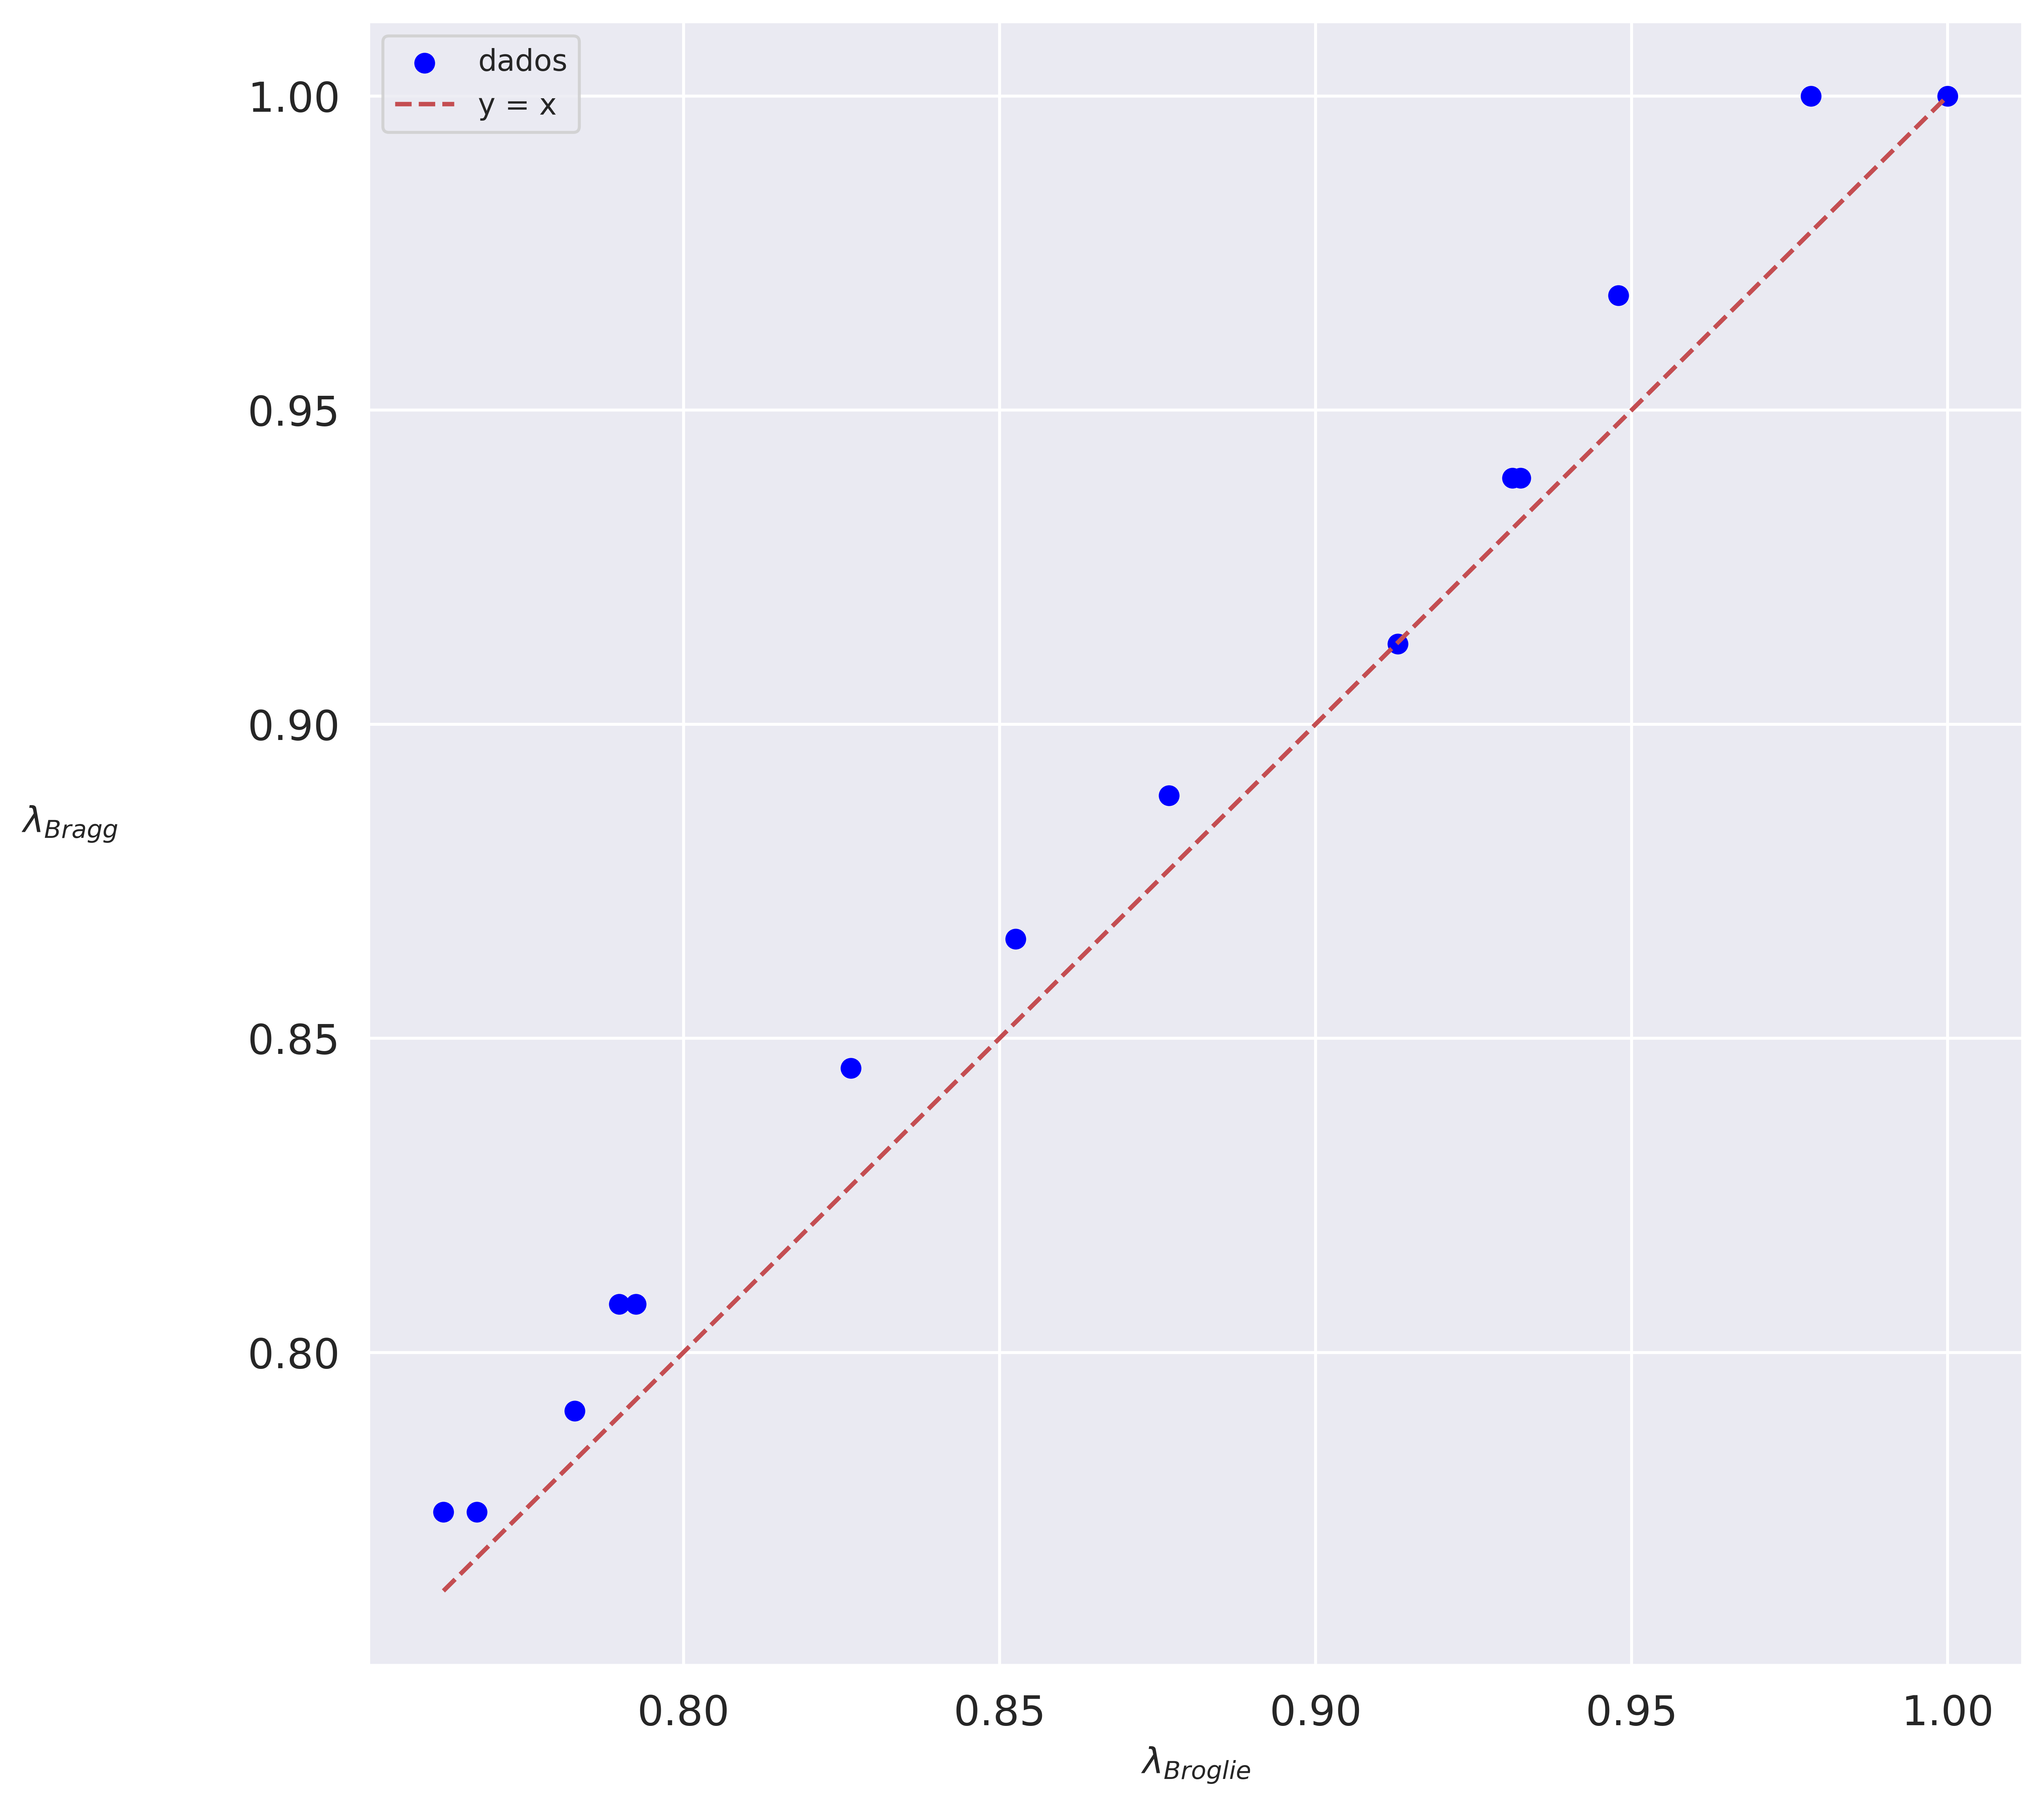

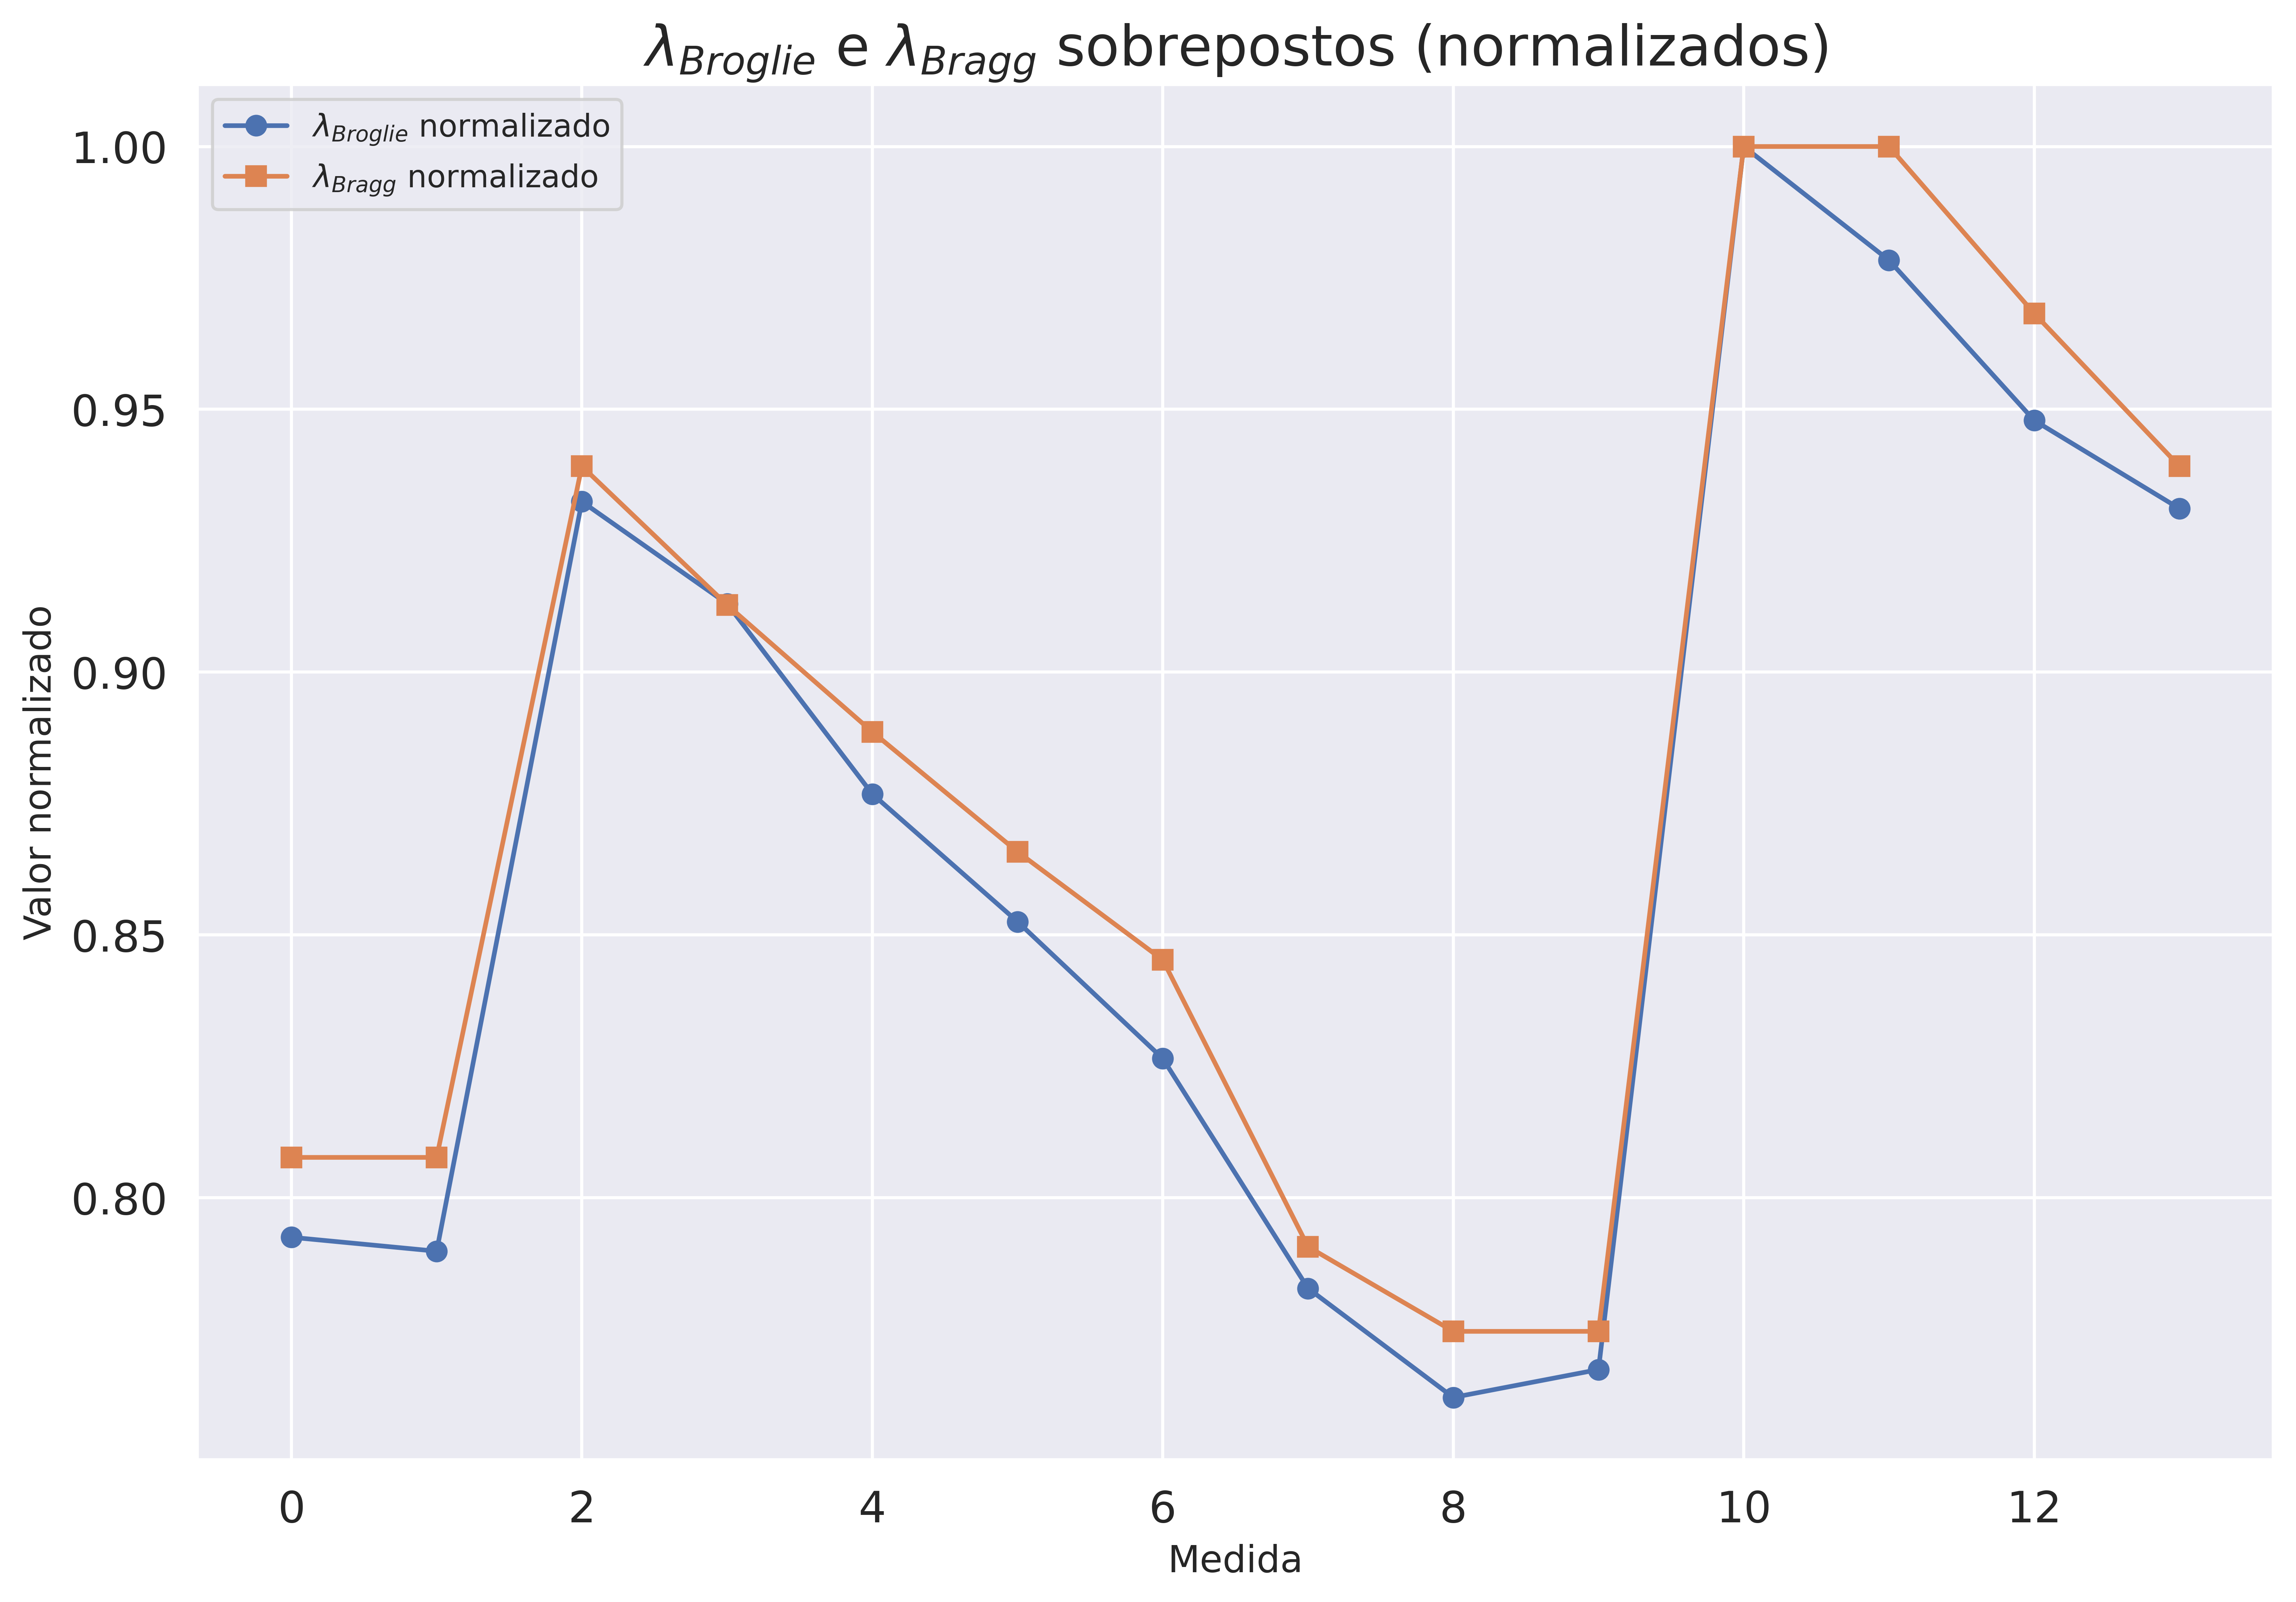

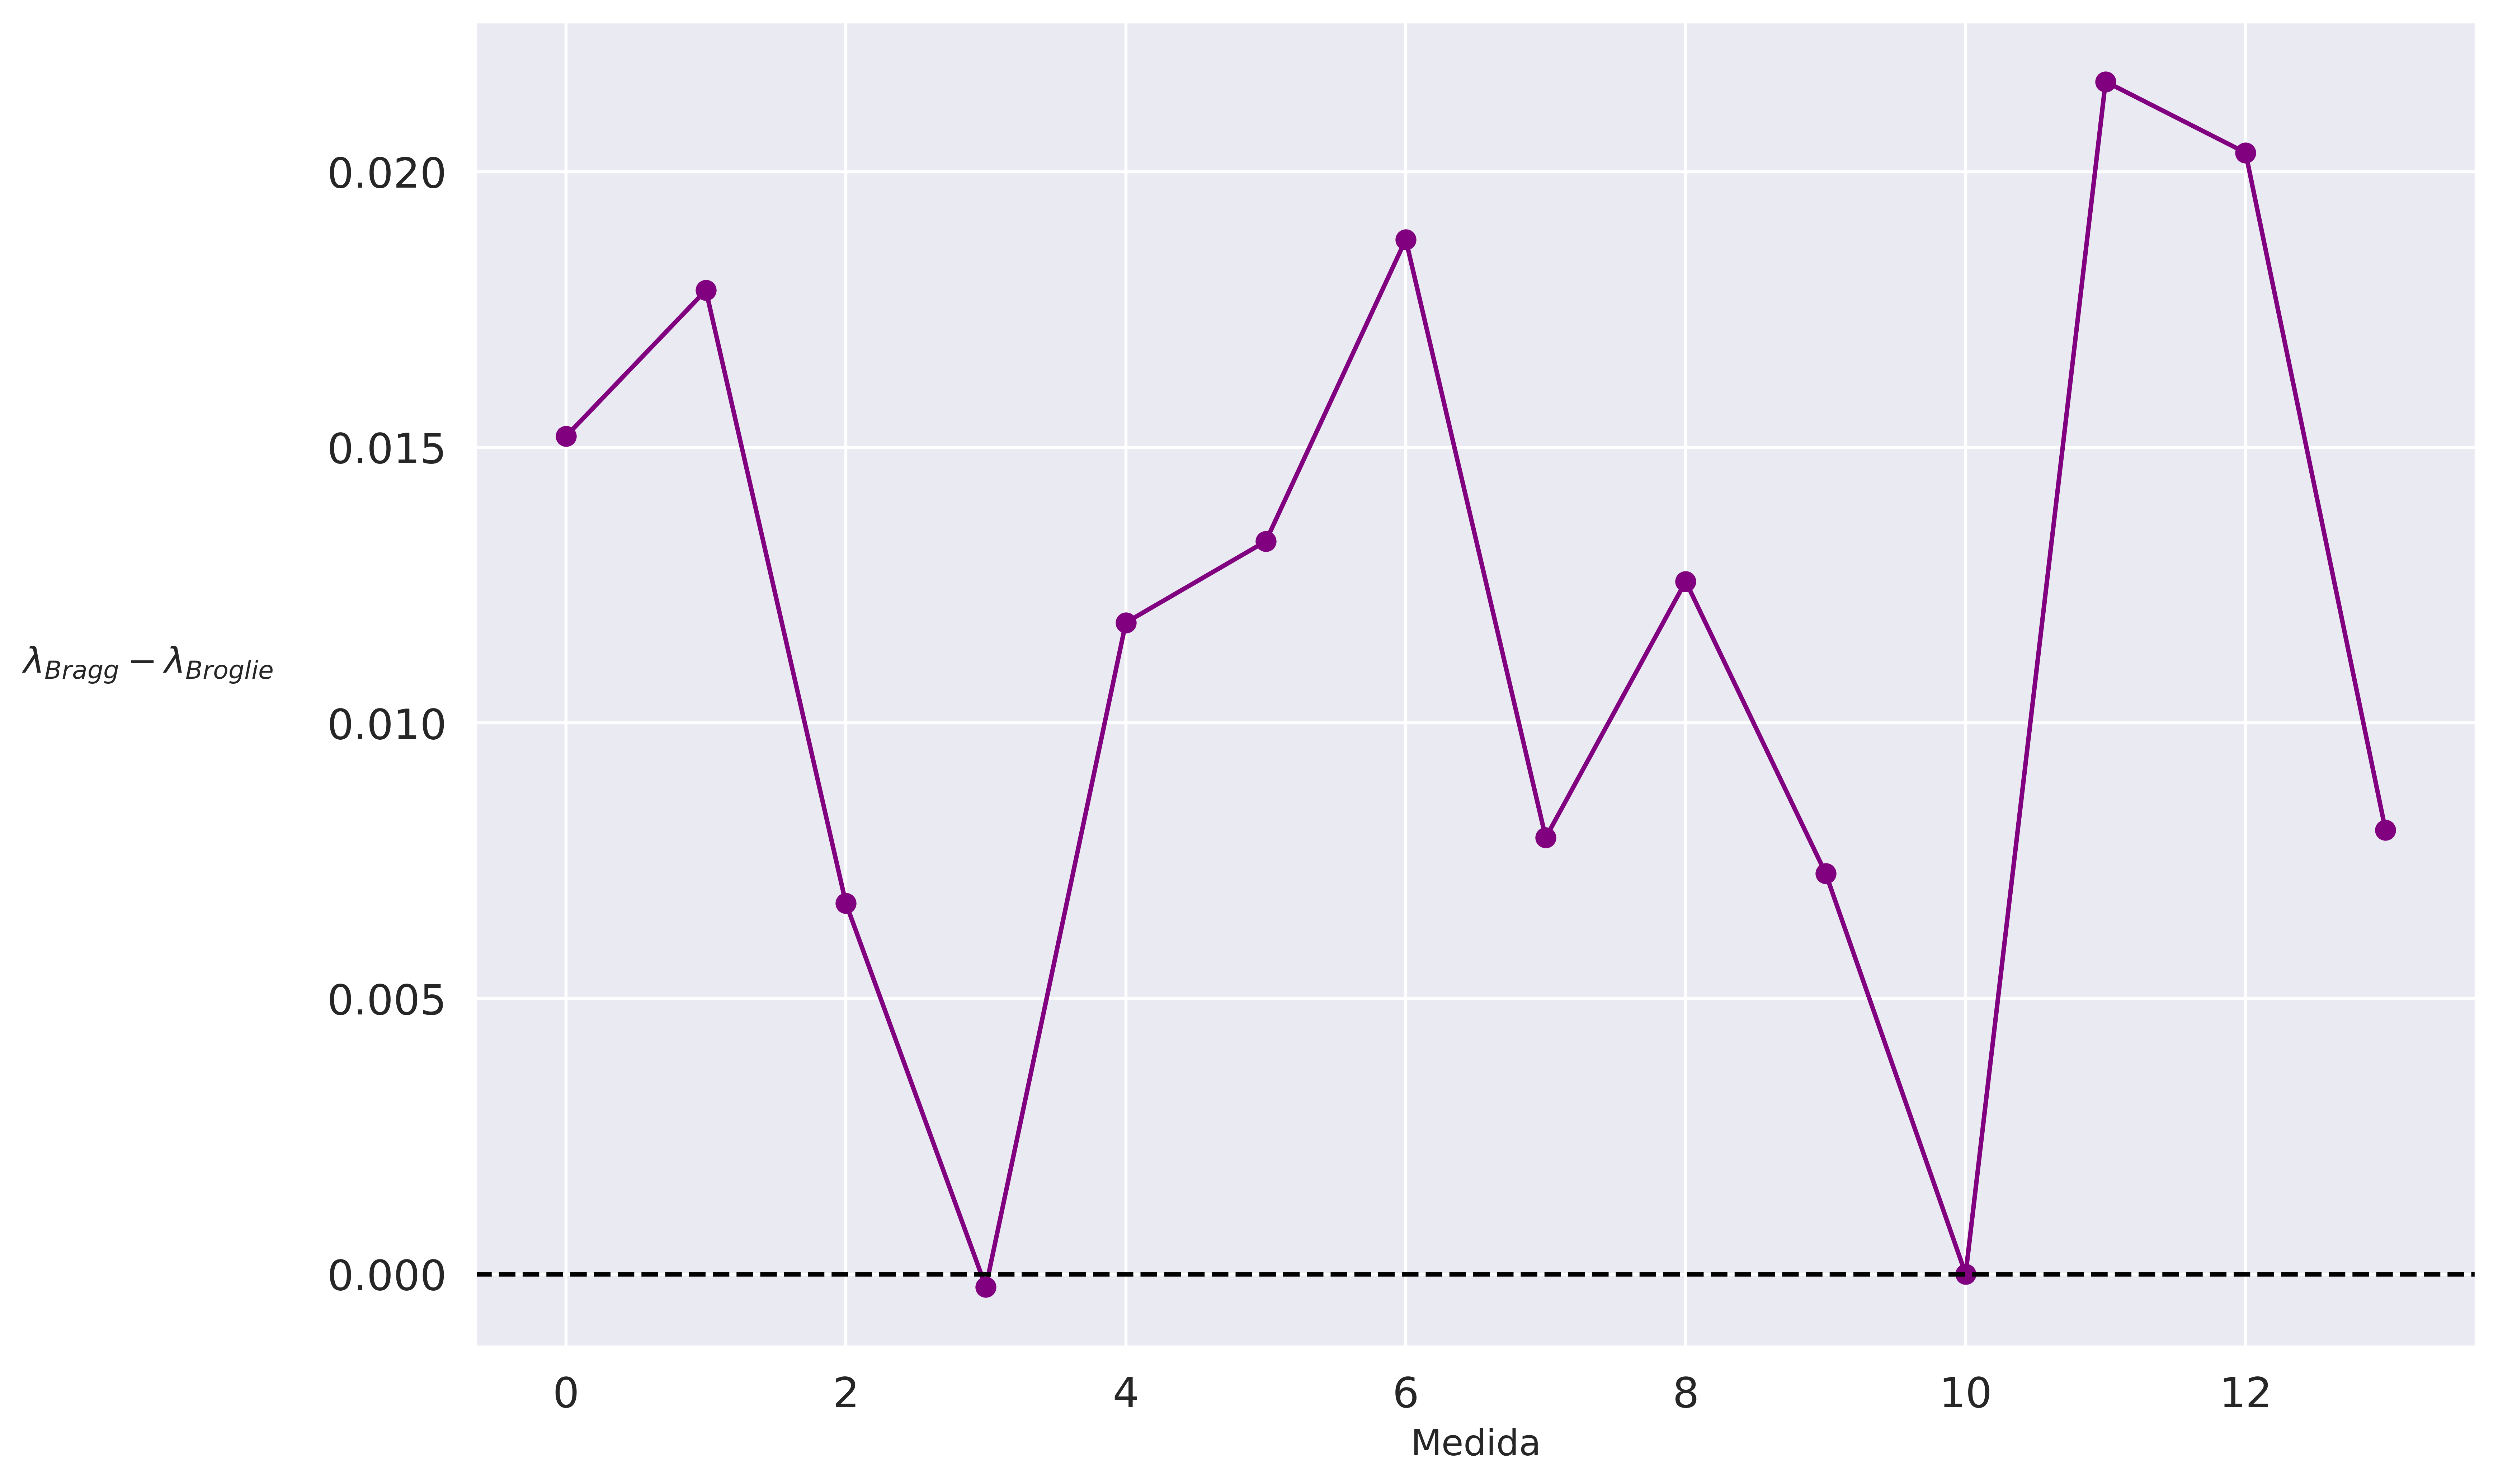

In [14]:

# carregar a tabela do CSV
df = pd.read_csv("resultados.csv")

# --- Normalização simples (divide pelo maior valor de cada coluna) ---
df["y1_val"] = df["y1_val"] / df["y1_val"].max()
df["melhor_y2"] = df["melhor_y2"] / df["melhor_y2"].max()

# 1. scatter plot y1 vs y2
plt.figure(figsize=(10,10), dpi=600)
plt.scatter(df["y1_val"], df["melhor_y2"], color="blue", label="dados")
plt.plot([df["y1_val"].min(), df["y1_val"].max()],
         [df["y1_val"].min(), df["y1_val"].max()],
         "r--", label="y = x")  # linha ideal
plt.xlabel(r'$\lambda_{Broglie}$')
plt.ylabel(r'$\lambda_{Bragg}$',rotation=0, labelpad=60)
plt.legend()
# plt.title(r'Comparação entre $\lambda_{Broglie}$ e $\lambda_{Bragg}$ (normalizados)')
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/plot1.png", dpi=600,transparent=True,bbox_inches="tight")

# 2. linhas sobrepostas
plt.figure(figsize=(12,8), dpi=600)
plt.plot(df.index, df["y1_val"], "o-", label=r"$\lambda_{Broglie}$ normalizado")
plt.plot(df.index, df["melhor_y2"], "s-", label=r"$\lambda_{Bragg}$ normalizado")
plt.xlabel("Medida")
plt.ylabel("Valor normalizado")
plt.legend()
plt.title(r"$\lambda_{Broglie}$ e $\lambda_{Bragg}$ sobrepostos (normalizados)")
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/plot2.png", dpi=600,transparent=True,bbox_inches="tight")

# 3. diferença (residuals)
plt.figure(figsize=(12,8), dpi=600)
plt.plot(df.index, df["melhor_y2"]- df["y1_val"], "o-", color="purple")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Medida")
plt.ylabel(r"$\lambda_{Bragg} - \lambda_{Broglie}$",rotation=0, labelpad=60)
# plt.title(r"Diferença entre $\lambda_{Bragg}$ e $\lambda_{Broglie}$ (normalizados)")
plt.savefig("/home/jvloliveira/root/Graduação/Semestre 2 - 2025/Laboratório Avançado/Projeto-1/Gráficos/plot3.png", dpi=600,transparent=True,bbox_inches="tight")
